<a href="https://colab.research.google.com/github/tsilva/aiml-notebooks/blob/main/Linear_Classifier_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classifier - Logistic Regression Model

In this notebook we will create a linear classifier for binary classification, meaning, we will classify data into one of two categories. Our data will be a dataset of 2D points, clustered in two regions, so that we know that it's possible to draw a line that separates said region, meaning that they are classifiable by a linear model.

The model we are going to build is a logistic regression model, meaning that given the inputs (the 2D points), by applying linear operations on it (eg: sums, multiplications), and then applying the sigmoid function (aka logistic function) on the result, it outputs a value between `0.0` and `1.0`. This value will represent the probability that a point belongs to the second cluster.

## Setup

First, let's install the required extensions:

In [37]:
!pip install torch

Now let's set a seed for the random number generator so that we get the same results every time we run this notebook. You should get the same output every time you run this cell:

In [38]:
import torch

torch.random.manual_seed(0)
torch.randn(1)

tensor([1.5410])

## Generate the Data

Now let's generate two clusters of points that can be separated by a line.
Let's generate our first cluster `x0`:

In [39]:
n_points = 20
x0 = torch.randn(n_points, 2)
x0.shape, x0

(torch.Size([20, 2]),
 tensor([[ 0.8487,  0.6920],
         [-0.3160, -2.1152],
         [-0.3561,  0.4372],
         [ 0.4913, -0.2041],
         [ 0.1198,  1.2377],
         [ 1.1168, -0.2473],
         [-1.0438, -1.3453],
         [ 0.7854,  0.9928],
         [ 0.5988, -1.5551],
         [-0.3414,  1.8530],
         [ 0.4681, -0.1577],
         [ 1.4437,  0.2660],
         [-0.1740, -0.6787],
         [ 0.9383,  0.4889],
         [-0.6731,  0.8728],
         [ 1.0554,  0.1778],
         [-0.5181, -0.3067],
         [-1.5810,  1.7066],
         [-0.4462,  0.7440],
         [ 1.5210,  3.4105]]))

NOTE: In this notebook we'll use tensors instead of numpy arrays wherever possible. Tensors provide mostly the same functionaly was numpy arrays, but also allow to track gradients (how much each variable in a calculation contributed to the result), we'll need that later on.

Let's visualize cluster `x0`:

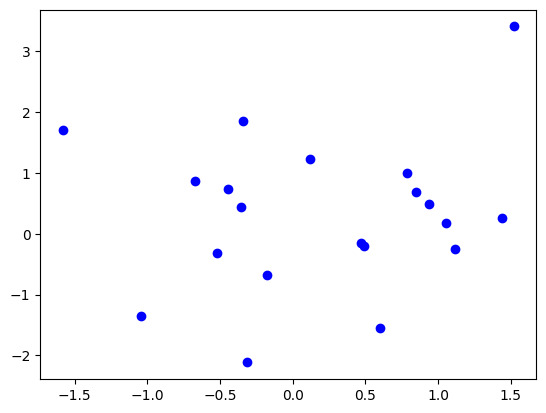

In [40]:
from matplotlib import pyplot as plt

x_values = x0[:, 0]
y_values = x0[:, 1]
plt.scatter(x_values, y_values, color='blue', label='Class 0')

Now let's generate our second cluster `x1`:

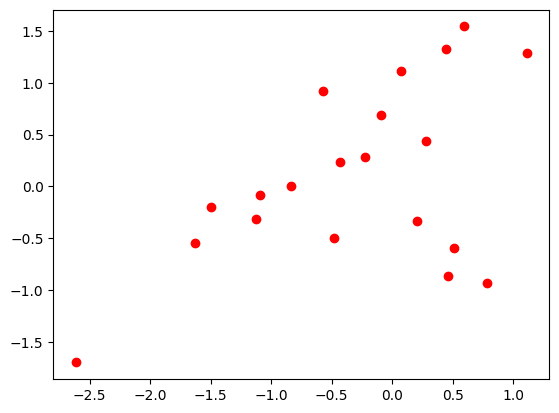

In [41]:
x1 = torch.randn(n_points, 2)
x_values = x1[:, 0]
y_values = x1[:, 1]
plt.scatter(x_values, y_values, color='red', label='Class 1')

And now plot both clusters together:

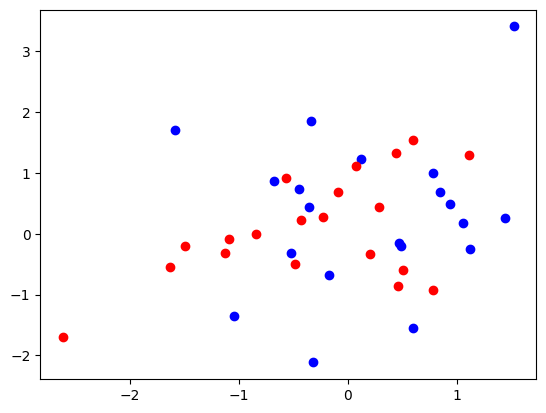

In [42]:
plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Class 1')

These are not linearly separable, let's spread them apart a bit more:

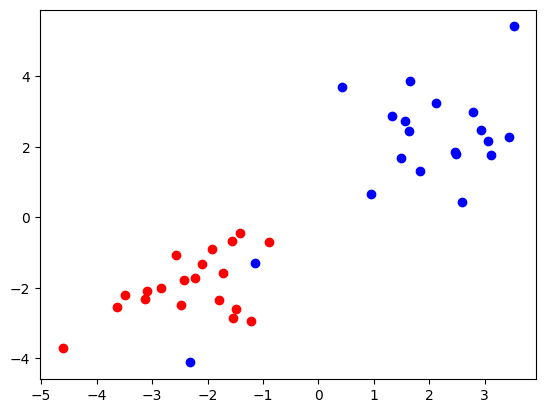

In [43]:
x0 += 2 # Move the first cluster up and to the right
x1 -= 2 # Move the second cluster down and to the left
x0[:2] -= 4 # Actually let's move some points into the first cluster's boundary to make classification trickier
plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Class 1')

## Build the Model

To classify our clusters we are going to build a logistic regression model. A logistic regression model is a model that given a set of inputs, applies linear transformations to it (eg: sums and multiplications) followed by a sigmoid function, which squashes the value to a range from `0` to `1`. We want to classify our inputs as belonging to one of two classes, so we can say that outputs close to `0` mean the point belongs to cluster `x0`, and `1` means it belongs to the cluster `x1`.

Let's build our model:

In [44]:
def model_fn(x, params):
    a, b = params
    return torch.sigmoid(x @ a + b)

model_params = (
    torch.randn(2, 1, dtype=torch.float32), # A single point is a tensor of shape (1, 2), multiplied with these weights of (2, 1), results in shape (1,), our next param
    torch.randn(1, dtype=torch.float32) # Shape (1, )
)
model_params, model_fn(torch.tensor([0, 0]).float(), model_params)

((tensor([[-0.2934],
          [ 1.3232]]),
  tensor([0.0371])),
 tensor([0.5093]))

NOTE: If you're familiar with Neural Networks, you may notice that the linear regression model is pretty much like a single neuron with a sigmoid activation function, if you think of `a` as the weights, then `torch.sigmoid(x @ a + b)` follows the neuron M.O. of "pick the input, multiply the weights, add a bias, activate".

## Plot the Decision Boundary

We'd like to see how our model separates the two clusters by drawing its separating line on the same plane. However, the model outputs values between `0` and `1` (probabilities), so we can't just plot it.

What we want is to determine when our model outputs `0.5`, which is the threshold at which the classification changes. Solving for `0.5` will allow us to determine the `Y` value for any `X` value along that threshold, allowing us to plot the threshold line itself (the decision boundary).

Let's solve step by step:

1. **Logistic Regression Model Function:**
   The model function for logistic regression is defined using the sigmoid function:
   $$
   \text{sigmoid}(z) = \frac{1}{1 + \exp(-z)}
   $$
   where $z = x \cdot a + b$.

2. **Set the Model Output to 0.5:**
   The decision boundary is the point where the model's output is 0.5. This is the threshold at which the classification changes from one class to another. So we set the sigmoid function equal to 0.5:
   $$
   0.5 = \frac{1}{1 + \exp(-z)}
   $$

3. **Solve for $z$:**
   To find the value of $z$ that makes the sigmoid function equal to 0.5, we solve the equation:
   $$
   0.5 = \frac{1}{1 + \exp(-z)}
   $$
   Multiply both sides by $(1 + \exp(-z))$:
   $$
   0.5 \cdot (1 + \exp(-z)) = 1
   $$
   Simplify the left side:
   $$
   0.5 + 0.5 \cdot \exp(-z) = 1
   $$
   Subtract 0.5 from both sides:
   $$
   0.5 \cdot \exp(-z) = 0.5
   $$
   Divide both sides by 0.5:
   $$
   \exp(-z) = 1
   $$
   Take the natural logarithm of both sides:
   $$
   -z = \ln(1)
   $$
   Simplify, noting that $\ln(1) = 0$:
   $$
   -z = 0
   $$
   Therefore:
   $$
   z = 0
   $$

4. **Express $z$ in Terms of the Model Parameters:**
   Recall that $z = x \cdot a + b$. At the decision boundary, we have:
   $$
   x \cdot a + b = 0
   $$

5. **Solve for $x$:**
   We need to find the x-values that satisfy this equation. If we have two features (for simplicity, let's assume $a$ is a vector with two elements $a_0$ and $a_1$), the equation becomes:
   $$
   x_0 \cdot a_0 + x_1 \cdot a_1 + b = 0
   $$
   Solving for $x_1$ in terms of $x_0$:
   $$
   x_1 = -\frac{x_0 \cdot a_0 + b}{a_1}
   $$
   This is the equation of the decision boundary line.

Remembering that `x0` and `x1` are our inputs, and since our input is a coordinate pair, `x0` is the `X` coordinate and `x1` is the `Y` coordinate, so given any `X` value, we'll be able to calculate the corresponding `Y` value for the decision boundary line.

Let's create a function that plots our data and the decision boundary line in the same graph:

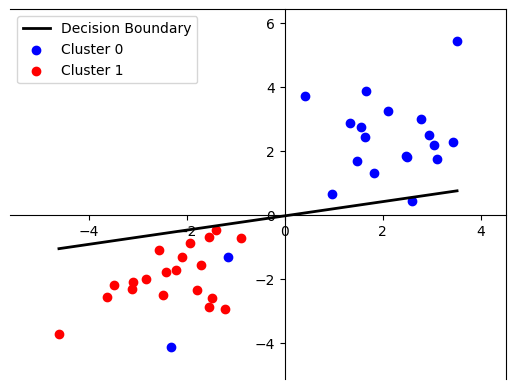

In [45]:
def plot_data(x0, x1, padding = 1):
  # Set the zero crossing of x and y axis
  fig, ax = plt.subplots()
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')

  # Calculate the decision boundary line using equation derived above:
  # - First we generate a sequence of x values in the range where we want to plot the line
  # - Then we calculate the y values for each of those x values using the equation derived above
  x_min = min(x0[:, 0].min(), x1[:, 0].min())
  x_max = max(x0[:, 0].max(), x1[:, 0].max())
  x_values = torch.linspace(x_min, x_max, 200)
  a, b = model_params
  with torch.no_grad(): y_values = -(x_values * a[0] + b) / a[1]

  # Plot the decision boundary line
  plt.plot(x_values.numpy(), y_values.numpy(), label='Decision Boundary', color='black', linewidth=2)
  plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='Cluster 0')
  plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Cluster 1')

  # Define the size of the plot
  y_min = min(x0[:, 1].min(), x1[:, 1].min())
  y_max = max(x0[:, 1].max(), x1[:, 1].max())
  plt.xlim(x_min - padding, x_max + padding)
  plt.ylim(y_min - padding, y_max + padding)

  # Output the legend
  plt.legend()

plot_data(x0, x1)

Notice how the line is not separating the clusters as well as it should. It is excluding three points from `Cluster 0`, when it could be just excluding two. We'll need to tune our model's parameters until we get a better split. But before that we need to find a metric that quantifies how good our model is. Then we'll try to improve that metric as much as we can. Once that happens we'll be able to see that our decision boundary has improved.

## Create the dataset

To evaluate our model we first need to create a single dataset with the inputs that are going to be fed to it, and the expected outputs for each of those inputs.

The function we aim to model assigns a cluster identifier (either `0` or `1`) to each coordinate pair in a dataset. This means that all coordinate pairs are our feature set `X`, and the corresponding cluster identifiers are our target set `Y`.

To create the dataset, we need two tensors:

- A tensor for `X`, which contains all the coordinate pairs.
- A tensor for `Y`, which contains the cluster identifiers for each coordinate pair.

The objective is to adjust the model parameters such that for any given value of `X`, the model can predict `Y` as accurately as possible, reflecting the patterns in the original data.

Let's create the `Y` values for each cluster:

In [46]:
y0 = torch.zeros(n_points, 1) # First cluster points are assigned label zero
y1 = torch.ones(n_points, 1) # Second cluster points are assigned label one
y0, y1

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

Let's now create a single `X` tensor by merging `x0` and `x1`. Let's first inspect them:

In [47]:
x0.shape, x0, x1.shape, x1

(torch.Size([20, 2]),
 tensor([[-1.1513, -1.3080],
         [-2.3160, -4.1152],
         [ 1.6439,  2.4372],
         [ 2.4913,  1.7959],
         [ 2.1198,  3.2377],
         [ 3.1168,  1.7527],
         [ 0.9562,  0.6547],
         [ 2.7854,  2.9928],
         [ 2.5988,  0.4449],
         [ 1.6586,  3.8530],
         [ 2.4681,  1.8423],
         [ 3.4437,  2.2660],
         [ 1.8260,  1.3213],
         [ 2.9383,  2.4889],
         [ 1.3269,  2.8728],
         [ 3.0554,  2.1778],
         [ 1.4819,  1.6933],
         [ 0.4190,  3.7066],
         [ 1.5538,  2.7440],
         [ 3.5210,  5.4105]]),
 torch.Size([20, 2]),
 tensor([[-1.4057, -0.4581],
         [-1.4927, -2.5910],
         [-2.5692, -1.0800],
         [-0.8892, -0.7101],
         [-3.4959, -2.1938],
         [-1.5545, -0.6747],
         [-3.6293, -2.5497],
         [-2.4798, -2.4997],
         [-3.1256, -2.3170],
         [-3.0925, -2.0852],
         [-2.0933, -1.3129],
         [-2.8383, -1.9991],
         [-4.6133, -3.6965

Now let's vertically stack them into a single tensor:

In [48]:
X = torch.vstack((x0, x1))
X.shape, X

(torch.Size([40, 2]),
 tensor([[-1.1513, -1.3080],
         [-2.3160, -4.1152],
         [ 1.6439,  2.4372],
         [ 2.4913,  1.7959],
         [ 2.1198,  3.2377],
         [ 3.1168,  1.7527],
         [ 0.9562,  0.6547],
         [ 2.7854,  2.9928],
         [ 2.5988,  0.4449],
         [ 1.6586,  3.8530],
         [ 2.4681,  1.8423],
         [ 3.4437,  2.2660],
         [ 1.8260,  1.3213],
         [ 2.9383,  2.4889],
         [ 1.3269,  2.8728],
         [ 3.0554,  2.1778],
         [ 1.4819,  1.6933],
         [ 0.4190,  3.7066],
         [ 1.5538,  2.7440],
         [ 3.5210,  5.4105],
         [-1.4057, -0.4581],
         [-1.4927, -2.5910],
         [-2.5692, -1.0800],
         [-0.8892, -0.7101],
         [-3.4959, -2.1938],
         [-1.5545, -0.6747],
         [-3.6293, -2.5497],
         [-2.4798, -2.4997],
         [-3.1256, -2.3170],
         [-3.0925, -2.0852],
         [-2.0933, -1.3129],
         [-2.8383, -1.9991],
         [-4.6133, -3.6965],
         [-2.2282, -1

And now let's do the same thing for `Y`. All points in `x0` belong to cluster `0`, and all points in `x1` belong to cluster `1`, therefore our `Y` is just the concatenation of `y0` and `y1`:

In [49]:
Y = torch.cat((y0, y1))
Y.shape, Y

(torch.Size([40, 1]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

## Measure model performance

We can now evaluate our model's performance in predicting `Y` values based on `X` values using **binary cross-entropy loss**. This metric measures the difference between predicted probabilities and actual outcomes, emphasizing accurate predictions by assigning larger losses to incorrect predictions. Unlike **mean squared error loss**, binary cross-entropy loss better penalizes bad predictions, making it easier to find our way to the optimal target model parameters.

Our goal is to adjust the model's parameters to minimize this loss. Let's define the **binary cross-entropy loss** function and calculate the current loss:

In [50]:
def loss_fn(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

loss = loss_fn(model_fn(X, model_params), Y)
loss

tensor(2.2600)

## Evaluate model accuracy

Now that we have a metric that measures the model's performance and we have assembled our dataset, we can create a function that evaluates the model's accuracy.

Let's first get the current model predictions for our coordinate pairs:

In [51]:
y_pred = model_fn(X, model_params)
y_pred, Y

(tensor([[0.2049],
         [0.0088],
         [0.9416],
         [0.8432],
         [0.9759],
         [0.8087],
         [0.6509],
         [0.9601],
         [0.4659],
         [0.9905],
         [0.8520],
         [0.8834],
         [0.7772],
         [0.9219],
         [0.9692],
         [0.8831],
         [0.8633],
         [0.9920],
         [0.9613],
         [0.9979],
         [0.4609],
         [0.0496],
         [0.3457],
         [0.3449],
         [0.1371],
         [0.4014],
         [0.0935],
         [0.0729],
         [0.1080],
         [0.1401],
         [0.2524],
         [0.1449],
         [0.0293],
         [0.1701],
         [0.3611],
         [0.1779],
         [0.0355],
         [0.0299],
         [0.0742],
         [0.1696]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]

Predictions are probabilities, what we want are classifications. Anything that is lower than `0.5` should be `0` and everything above should be `1`, let's round the predictions to turn the probabilities into classifications:

In [52]:
torch.round(y_pred), Y

(tensor([[0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
        

In [53]:
matches = torch.round(y_pred) == torch.round(Y)
matches

tensor([[ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

Let's flatten the tensor to make it easier to visualize and operate on it:

In [54]:
matches = matches.flatten()
matches

tensor([ True,  True, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

Ouch, most predictions are wrong, our model sucks! Let's calculate our current accuracy:

In [55]:
accuracy = matches.float().mean()
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 7.50%


And finally let's encapsulate all this code so we can call it again later:

In [56]:
def calculate_accuracy(y_pred, y_true):
    matches = torch.round(y_pred) == torch.round(y_true)
    return matches.float().mean()

calculate_accuracy(model_fn(X, model_params), Y)

tensor(0.0750)

## Gradient Descent

Now that we know the current model accuracy, it's time to tune our model and get that accuracy up as much as we can.

To do so, we need to minimize the loss, we aim to make it as close to zero as possible. To achieve this, we need to track how much each parameter contributes to the loss and iteratively adjust them in a direction that reduces it.

PyTorch has the ability of tracking the gradients of a calculation. You can check the gradients by printing the `grad` attribute for a tensor:

In [57]:
model_params[0].grad, model_params[1].grad

(None, None)

These are empty because:

- We haven't enabled gradient tracking for those tensors.
- We haven't specified for which calculation we want to calculate the gradients (call `.backward()` on the result).

Let's do both those things:

In [58]:
model_params[0].requires_grad_()
model_params[1].requires_grad_()
loss = loss_fn(model_fn(X, model_params), Y)
loss, model_params[0].grad, model_params[1].grad

(tensor(2.2600, grad_fn=<NegBackward0>), None, None)

Still no gradients, but notice how the loss function now has a gradient function assigned to it. Invoke `.backward()` to calculate the gradients for the associated tensors:

In [59]:
loss.backward()
model_params[0].grad, model_params[1].grad

(tensor([[1.8206],
         [1.8410]]),
 tensor([-0.0112]))

Voila! Now that the gradients for the model parameters are available, we can use them to adjust the parameters in the right direction to minimize the loss:

In [60]:
model_params[0].data -= model_params[0].grad
model_params[1].data -= model_params[1].grad
loss = loss_fn(model_fn(X, model_params), Y)
loss

tensor(0.2688, grad_fn=<NegBackward0>)

It's working, the loss has decreased from `2.26` to `0.27`! Let's try again:

In [61]:
# Let's zero out our gradients first (otherwise they'll our next calculation will just add to existing gradients)
model_params[0].grad.zero_()
model_params[1].grad.zero_()

# Calculate the loss and respective gradients
loss = loss_fn(model_fn(X, model_params), Y)
loss.backward()

# Adjust the model parameters
model_params[0].data -= model_params[0].grad
model_params[1].data -= model_params[1].grad

# Calculate the new loss
loss = loss_fn(model_fn(X, model_params), Y)
loss

tensor(0.2484, grad_fn=<NegBackward0>)

It decreased again, from `0.27` to `0.25`!

## Train the Model

Let's encapsulate the training algorithm in a function for reusability and call it a couple more times:

In [62]:
def train(n_epochs, learning_rate = 1, verbose=True):
  for epoch in range(n_epochs):
    model_params[0].grad.zero_()
    model_params[1].grad.zero_()

    loss = loss_fn(model_fn(X, model_params), Y)
    loss.backward()

    with torch.no_grad():
      model_params[0].data -= learning_rate * model_params[0].grad
      model_params[1].data -= learning_rate * model_params[1].grad

    if verbose: print(f"epoch={epoch}, loss={loss}")
  return loss

train(10)

epoch=0, loss=0.24837049841880798
epoch=1, loss=0.2305900752544403
epoch=2, loss=0.21591520309448242
epoch=3, loss=0.20457573235034943
epoch=4, loss=0.19641585648059845
epoch=5, loss=0.19089671969413757
epoch=6, loss=0.18728092312812805
epoch=7, loss=0.18487097322940826
epoch=8, loss=0.18315814435482025
epoch=9, loss=0.1818353831768036


tensor(0.1818, grad_fn=<NegBackward0>)

Keeps going down, let's run it longer:

In [63]:
train(2000, verbose=False)

tensor(0.1640, grad_fn=<NegBackward0>)

Now just a few more times to see if it's still decreasing:

In [64]:
train(5)

epoch=0, loss=0.16400578618049622
epoch=1, loss=0.16400578618049622
epoch=2, loss=0.16400578618049622
epoch=3, loss=0.16400578618049622
epoch=4, loss=0.16400578618049622


tensor(0.1640, grad_fn=<NegBackward0>)

We have reached the minimum loss, our model should now be as good as it can be.

## Final Decision Boundary

Now that our model is tuned, let's plot the decision boundary again:

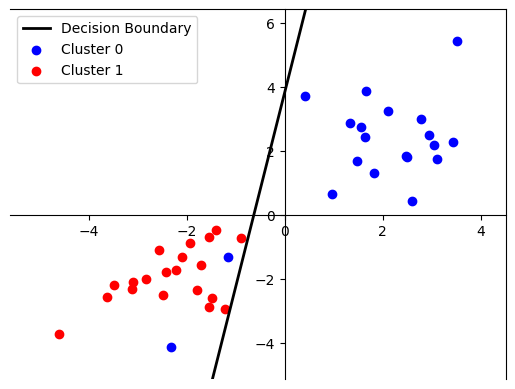

In [65]:
plot_data(x0, x1)

Seems to be cleanly separating our data, meaning it should be able to accurately predict all values except for those two outliers that fall into the other cluster.

Let's check how many predictions we're missing:

In [66]:
y_pred = model_fn(X, model_params)
matches = torch.round(y_pred) == torch.round(Y)
matches = matches.flatten()
correct = torch.sum(matches == True)
incorrect = torch.sum(matches == False)
correct, incorrect, correct / (correct + incorrect) * 100

(tensor(38), tensor(2), tensor(95.))

Out of `40` predictions, we predicted `38` correctly, missing only `2` which are just outside the reach of a linear classifier, giving us an accuracy of `95%`, which is the best accuracy we could get!

The End! Roll the credits.